# Obdelava teniških podatkov

## Zajeti podatki

* ime turnirja
* leto v katerem se je turnir izvajal
* ime igralcev prisotnih na dvoboju
* podalaga na kateri se je turnir igral

## Analiza

S pomočjo teh podatkov bom analiziral število odigranig iger glede na dvoboj skozi leta v odvisnosti od podlage. Analizo je možno skrčiti tudi na posamezen turnir ali igralca. Prav tako je se lahko osredotočimo tudi na dvoboje v katerih je določen igralec zmagal ali izgubil.

## Hipoteza

* včasih so igralci v povprečju na dvoboj igrali manj iger kot jih igrajo danes, ker so bile podlage hitrejše

## Viri

Vsi podatki so bili pobrani s spletne strani [ATP World tour](http://www.atpworldtour.com/en). Zajeti so vsi podatki od leta 1968 do vključno leta 2015

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pd.set_option('display.max_rows', 30)
plt.rcParams['figure.figsize'] = (15, 5)

Tu naložimo datoteke podatki, igralci in turnirji.

In [2]:
podatki = pd.read_csv('C:/Users/Miha/pandas-cookbook/cookbook/projekt/podatki.csv')

In [3]:
igralci = pd.read_csv('C:/Users/Miha/pandas-cookbook/cookbook/projekt/igralci.csv')

In [4]:
turnirji = pd.read_csv('C:/Users/Miha/pandas-cookbook/cookbook/projekt/turnirji.csv')

V tabeli podatki vidimo indeks turnirja, ki je nastal v programu in nima nobenega pomena, leto turnirja, podlago, st_iger(za nepoznavalce: V tenisu se tekma igra na 2 ali 3 dobljene sete. Vsak set pa se igra na 6 dobljenih iger), indeks porazenca in zmagovalca.

In [5]:
podatki

,turnir,leto,podlaga,st_iger,zmagovalec,porazenec
0,0,1993,Hard,18,0,1
1,0,1993,Hard,29,1,2
2,0,1993,Hard,19,0,3
3,0,1993,Hard,20,1,4
4,0,1993,Hard,20,0,5
5,0,1993,Hard,32,3,6
6,0,1993,Hard,23,2,7
7,0,1993,Hard,19,1,8
8,0,1993,Hard,22,0,9
9,0,1993,Hard,15,4,10


Spodaj sem konstruiral 3 dodatne tabele. Vsaka je dodala ime turnirja\zmagovalca\poraženca

In [6]:
tabela = podatki.merge(turnirji,left_on="turnir", right_on="id")

In [7]:
tabela1 = tabela.merge(igralci,left_on="zmagovalec", right_on="id",suffixes = ("","_zmagovalca"))

In [8]:
tabela2 = tabela1.merge(igralci,left_on="porazenec", right_on="id",suffixes = ("","_porazenca"))

In [9]:
tabela2

,turnir,leto,podlaga,st_iger,zmagovalec,porazenec,id,ime,id_zmagovalca,ime_zmagovalca,id_porazenca,ime_porazenca
0,0,1993,Hard,18,0,1,0,acapulco,0,Thomas Muster,1,Carlos Costa
1,18,1995,Clay,30,0,1,18,barcelona,0,Thomas Muster,1,Carlos Costa
2,113,1997,Clay,16,0,1,113,kitzbuhel,0,Thomas Muster,1,Carlos Costa
3,194,1995,Clay,27,0,1,194,roland-garros,0,Thomas Muster,1,Carlos Costa
4,244,1995,Clay,32,0,1,244,umag,0,Thomas Muster,1,Carlos Costa
5,29,1996,Clay,19,6,1,29,bologna,6,Alberto Berasategui,1,Carlos Costa
6,94,1996,Clay,14,6,1,94,hamburg,6,Alberto Berasategui,1,Carlos Costa
7,136,1997,Clay,15,6,1,136,mallorca,6,Alberto Berasategui,1,Carlos Costa
8,151,1994,Clay,23,6,1,151,monte-carlo,6,Alberto Berasategui,1,Carlos Costa
9,175,1997,Clay,25,6,1,175,oeiras,6,Alberto Berasategui,1,Carlos Costa


Primer ki kaze koliko iger je lansko leto na posamičnem dvoboju na Wimbeldonu potreboval Djokovic, da je osvojil turnir. Seveda bi lahko iskali tudi po imenu turnirja in ne indeksu. Potem bi se ukaz glasil "tabela2[(tabela2.ime == "wimbledon") & (tabela2.leto == 2015) & (tabela2.ime_zmagovalca == "Novak Djokovic")]"

In [10]:
tabela2[(tabela2.turnir == 254) & (tabela2.leto == 2015) & (tabela2.ime_zmagovalca == "Novak Djokovic")]

,turnir,leto,podlaga,st_iger,zmagovalec,porazenec,id,ime,id_zmagovalca,ime_zmagovalca,id_porazenca,ime_porazenca
59862,254,2015,Grass,45,735,673,254,wimbledon,735,Novak Djokovic,673,Roger Federer
62217,254,2015,Grass,25,735,726,254,wimbledon,735,Novak Djokovic,726,Philipp Kohlschreiber
73577,254,2015,Grass,27,735,306,254,wimbledon,735,Novak Djokovic,306,Jarkko Nieminen
79467,254,2015,Grass,33,735,162,254,wimbledon,735,Novak Djokovic,162,Richard Gasquet
80384,254,2015,Grass,30,735,1891,254,wimbledon,735,Novak Djokovic,1891,Marin Cilic
88184,254,2015,Grass,27,735,314,254,wimbledon,735,Novak Djokovic,314,Bernard Tomic
95345,254,2015,Grass,55,735,287,254,wimbledon,735,Novak Djokovic,287,Kevin Anderson


In [11]:
podatki.groupby("leto").mean()

,turnir,st_iger,zmagovalec,porazenec
leto,,,,
1968,152.414667,27.920000,1223.585333,1940.888000
1969,151.331849,28.228656,1028.944321,1514.589458
1970,142.645764,25.004153,984.187708,1444.120017
1971,144.018312,25.354299,882.724124,1120.763137
1972,151.013338,24.901018,871.219375,1064.298350
1973,142.267578,23.562221,843.680246,1061.618862
1974,144.023783,23.289502,824.507381,991.286222
1975,139.893445,22.706190,821.945155,952.475842
1976,138.016155,23.243673,829.089930,901.225363


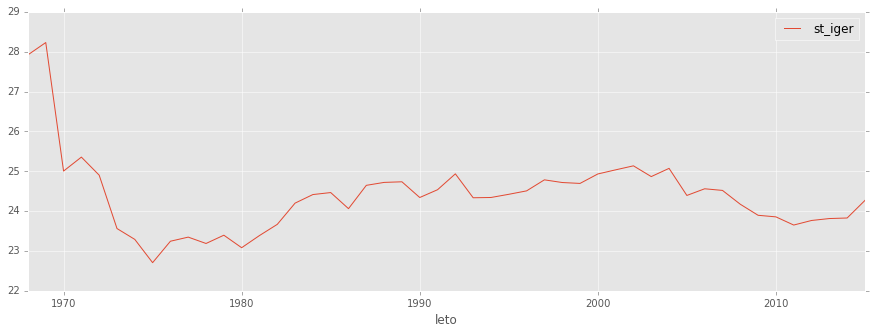

In [12]:
podatki.groupby("leto").mean().plot(y="st_iger")

Podatki kazejo da se je skozi leta povprečno število iger nekoliko dvignilo, a ne toliko, da bi to bistveno vplivalo na količino odigranih iger. V tem stoletju pa je število iger ponovno nekoliko upadlo.

In [13]:
podatki[podatki.podlaga == "Grass"].groupby("leto").mean()

,turnir,st_iger,zmagovalec,porazenec
leto,,,,
1968,201.017937,28.156951,1238.784753,1899.753363
1969,183.470588,31.591696,876.145329,1257.031142
1970,162.911985,24.417603,1116.451311,1709.773408
1971,168.265306,27.755102,871.769679,1088.897959
1972,168.782748,29.134185,946.249201,1154.476038
1973,182.413897,28.851964,934.027190,1478.570997
1974,188.211039,29.081169,956.642857,1231.740260
1975,213.582278,33.588608,728.968354,855.582278
1976,244.915493,35.915493,687.669014,780.436620


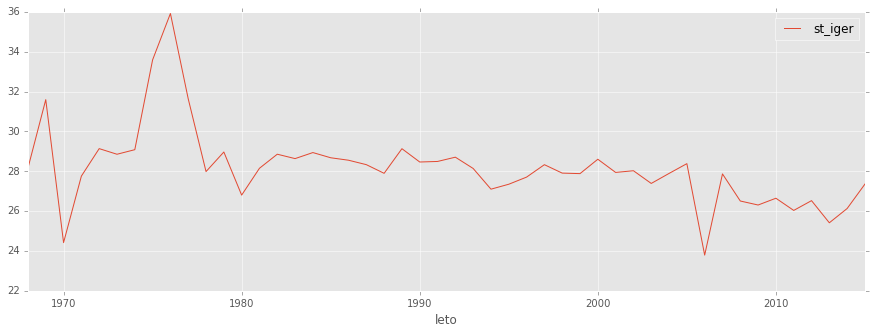

In [14]:
podatki[podatki.podlaga == "Grass"].groupby("leto").mean().plot(y="st_iger")

Tukaj vidimo še primer povprečnega števila iger za posamezno podlago.

Sedaj pa si isto oglejmo še za posameznega igralca

In [15]:
tabela2[(tabela2.ime_zmagovalca == "Novak Djokovic") | (tabela2.ime_porazenca == "Novak Djokovic")].groupby("leto").mean()

,turnir,st_iger,zmagovalec,porazenec,id,id_zmagovalca,id_porazenca
leto,,,,,,,
2004,85.750000,27.500000,527.750000,721.000000,85.750000,527.750000,721.000000
2005,185.000000,26.533333,563.266667,503.066667,185.000000,563.266667,503.066667
2006,177.767442,23.953488,627.023256,838.000000,177.767442,627.023256,838.000000
2007,162.521127,26.619718,663.887324,517.619718,162.521127,663.887324,517.619718
2008,134.328125,24.750000,676.718750,639.031250,134.328125,676.718750,639.031250
2009,132.250000,23.641304,706.445652,645.619565,132.250000,706.445652,645.619565
2010,141.900000,25.428571,697.842857,588.871429,141.900000,697.842857,588.871429
2011,139.960000,24.493333,721.986667,514.413333,139.960000,721.986667,514.413333
2012,149.723684,24.855263,686.157895,542.552632,149.723684,686.157895,542.552632


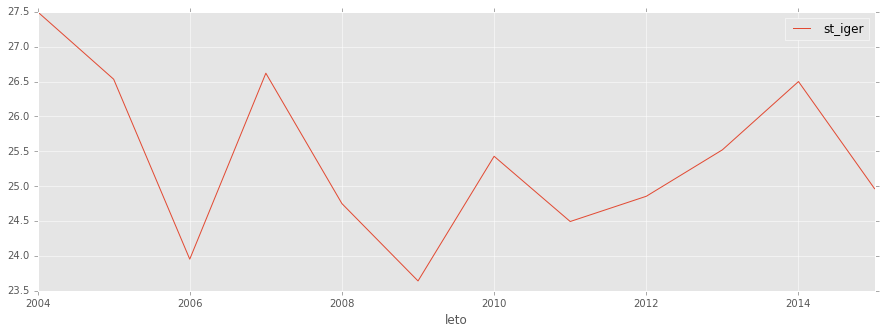

In [16]:
tabela2[(tabela2.ime_zmagovalca == "Novak Djokovic") | (tabela2.ime_porazenca == "Novak Djokovic")]\
    .groupby("leto").mean()\
    .plot(y="st_iger")

In [17]:
tabela2[(tabela2.ime_zmagovalca == "Novak Djokovic")].groupby("leto").mean()

,turnir,st_iger,zmagovalec,porazenec,id,id_zmagovalca,id_porazenca
leto,,,,,,,
2004,41.000000,28.000000,735,679.000000,41.000000,735,679.000000
2005,206.714286,27.571429,735,238.000000,206.714286,735,238.000000
2006,190.851852,24.037037,735,899.037037,190.851852,735,899.037037
2007,164.789474,26.824561,735,464.228070,164.789474,735,464.228070
2008,129.549020,24.176471,735,614.568627,129.549020,735,614.568627
2009,127.868421,22.934211,735,626.802632,127.868421,735,626.802632
2010,140.166667,24.629630,735,545.574074,140.166667,735,545.574074
2011,141.366197,24.225352,735,501.985915,141.366197,735,501.985915
2012,148.166667,24.378788,735,513.393939,148.166667,735,513.393939


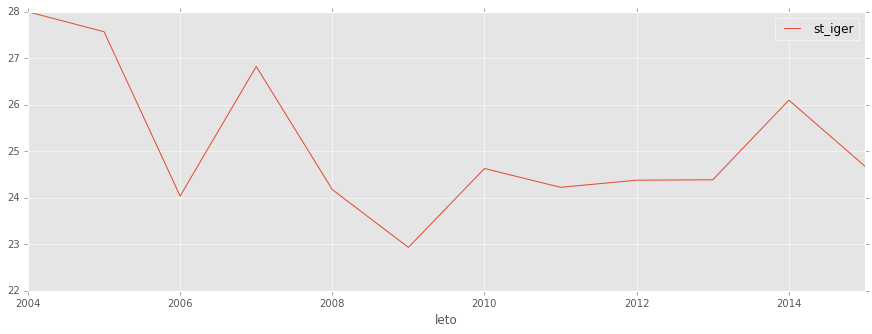

In [18]:
tabela2[(tabela2.ime_zmagovalca == "Novak Djokovic")].groupby("leto")\
    .mean()\
    .plot(y="st_iger")

In [19]:
tabela2[(tabela2.ime_porazenca == "Novak Djokovic")].groupby("leto").mean()

,turnir,st_iger,zmagovalec,porazenec,id,id_zmagovalca,id_porazenca
leto,,,,,,,
2004,100.666667,27.333333,458.666667,735,100.666667,458.666667,735
2005,166.000000,25.625000,413.000000,735,166.000000,413.000000,735
2006,155.687500,23.812500,444.812500,735,155.687500,444.812500,735
2007,153.285714,25.785714,374.357143,735,153.285714,374.357143,735
2008,153.076923,27.000000,448.076923,735,153.076923,448.076923,735
2009,153.062500,27.000000,570.812500,735,153.062500,570.812500,735
2010,147.750000,28.125000,572.437500,735,147.750000,572.437500,735
2011,115.000000,29.250000,491.000000,735,115.000000,491.000000,735
2012,160.000000,28.000000,363.800000,735,160.000000,363.800000,735


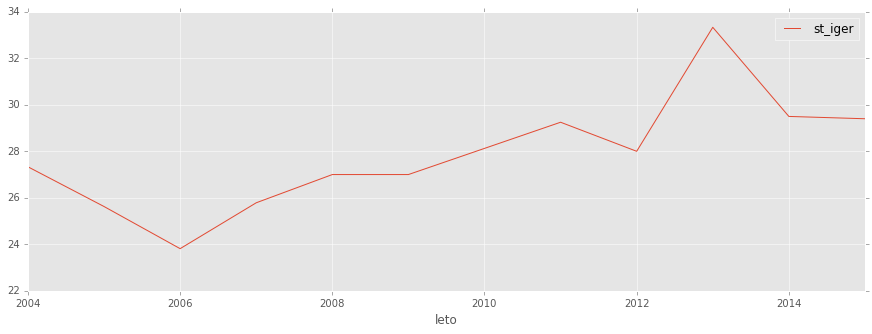

In [20]:
tabela2[(tabela2.ime_porazenca == "Novak Djokovic")].groupby("leto").mean().plot(y="st_iger")

Iz teh tabel lahko vidimo, da je Djokovic na začetku kariere hitreje igubljal kot zmagoval. V preteklih letih pa potrebuje manj iger da zmaga kot izgubi.

Podatki nasprotujejo naši hipotezi, da se je zaradi hitrejših podlag včasih igralo manj iger (vsaj gledano v takšni mere, ki bi se na posameznem dvoboju poznala).